In [12]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/MyungKyuYi/AI-class/refs/heads/main/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [14]:
# 2. 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [16]:
window = 12
X, y = [], []
for i in range(len(data_scaled)-window):
    X.append(data_scaled[i:i+window])
    y.append(data_scaled[i+window])
X, y = np.array(X), np.array(y)
y = y.reshape(-1,1)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [18]:
model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(window,1)),
    LSTM(32),
    Dense(1)
])
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
history = model.fit(X_train, y_train, epochs=150, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0879 - val_loss: 0.0140
Epoch 2/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0111 - val_loss: 0.0327
Epoch 3/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0072 - val_loss: 0.0169
Epoch 4/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0049 - val_loss: 0.0143
Epoch 5/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0043 - val_loss: 0.0151
Epoch 6/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0053 - val_loss: 0.0144
Epoch 7/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0052 - val_loss: 0.0158
Epoch 8/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0059 - val_loss: 0.0141
Epoch 9/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0047 - val_loss: 0.0137
Epoch 10/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0045 - val_loss: 0.0147
Epoch 11/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0049 - val_loss: 0.0144
Epoch 12/150
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step

In [20]:
y_pred_scaled = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_real = scaler.inverse_transform(y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 480ms/step


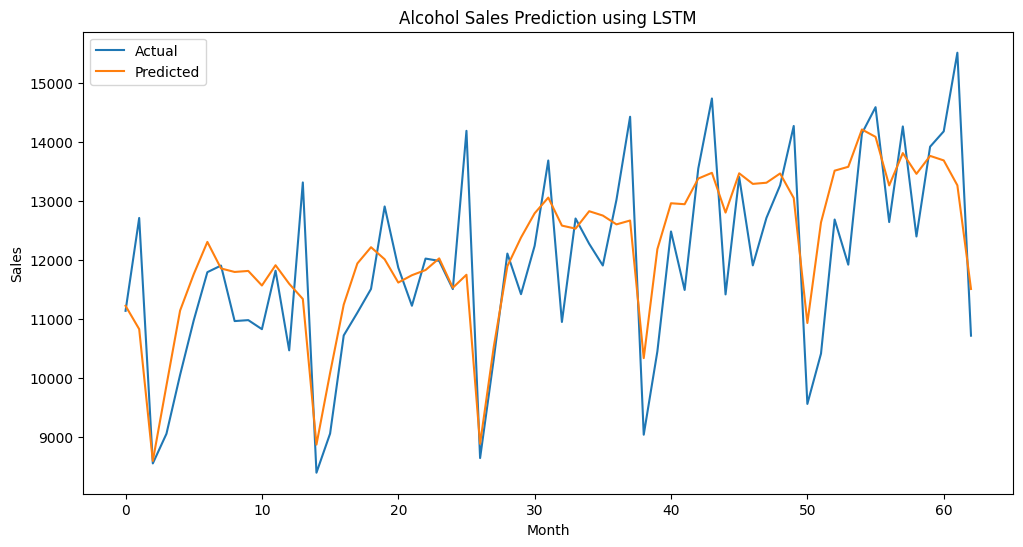

In [21]:
plt.figure(figsize=(12,6))
plt.plot(y_test_real, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('Alcohol Sales Prediction using LSTM')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()

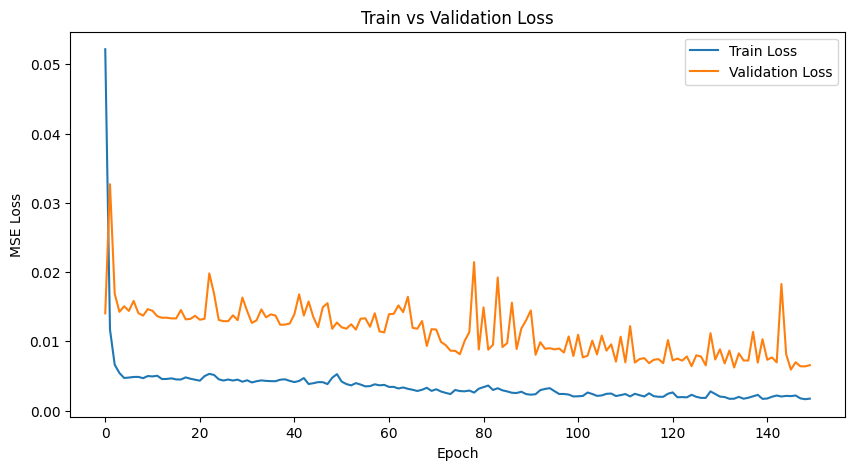

In [22]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.show()